In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import accuracy_score


In [2]:
import pandas as pd
# loads X train dataset (features of each instance)
x_train = pd.read_csv('CompleteDataSet/x_train_all.csv')
# load Y train dataset (classes of each instance)
y_train=pd.read_csv('CompleteDataSet/y_train_all.csv')

x_train.shape

(9690, 2304)

In [3]:
def TSNEplots(data,clusterlabels,title):
    
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)

    dataTSNE = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(dataTSNE[:, 0], dataTSNE[:, 1], c=clusterlabels,cmap="rainbow", s=20)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

In [4]:
def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

# Birch Clustering

In [5]:
from sklearn.cluster import Birch


In [85]:
def birchfunc(data,n_clusters):
    brc = Birch(threshold=0.3, branching_factor=50,n_clusters=n_clusters)
    clusters = brc.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    
    return clusters

In [7]:
infrared_df_norm = pd.read_csv("infrared_df_norm.csv")
infra_norm_no_outliers = pd.read_csv("infra_norm_no_outliers.csv")
prepped_infrared_df = pd.read_csv("prepped_infrared_df.csv")
testing_df = pd.read_csv("testing_df.csv")
infra_no_outliers = pd.read_csv('x_train_no_outliers.csv')
infrared_df_org = pd.read_csv("infrared_df_org.csv")

In [41]:
testing_df.shape

(9593, 3)

In [43]:
birch_labels_raw = birchfunc(x_train,10)

In [44]:
silhouetteScore(x_train,birch_labels_raw)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


0.08563693469224311

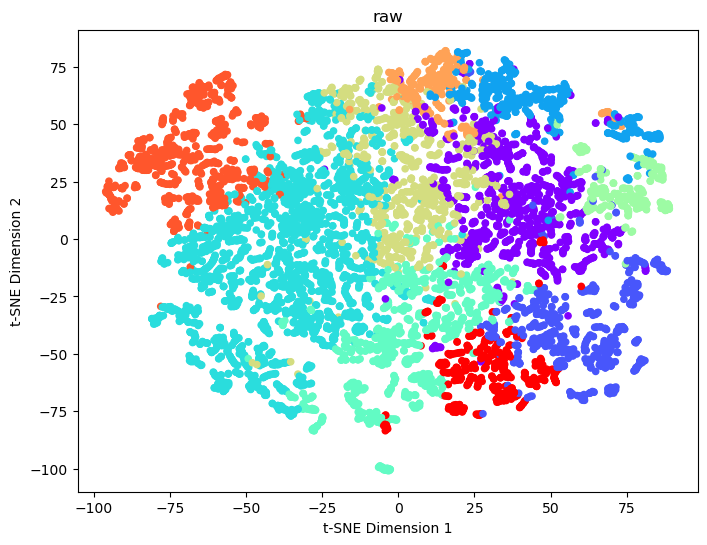

In [45]:
TSNEplots(x_train.to_numpy(),birch_labels_raw,"raw")

In [46]:
birch_labels_infra = birchfunc(infrared_df_org,10)

In [47]:
silhouetteScore(infrared_df_org,birch_labels_infra)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.14697351726416283


0.14697351726416283

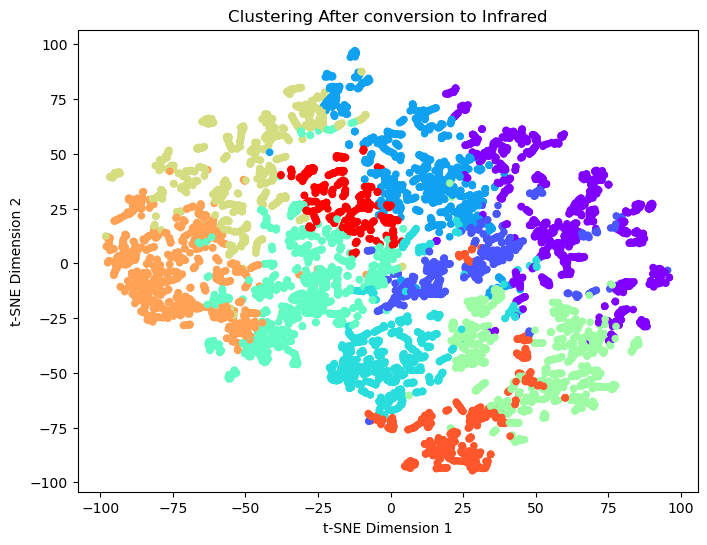

In [48]:
TSNEplots(infrared_df_org,birch_labels_infra,"Clustering After conversion to Infrared")

In [49]:
birch_labels_infra_no_outliers = birchfunc(infra_no_outliers, 10)

In [50]:
silhouetteScore(infra_no_outliers,birch_labels_infra_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08265232233522116


0.08265232233522116

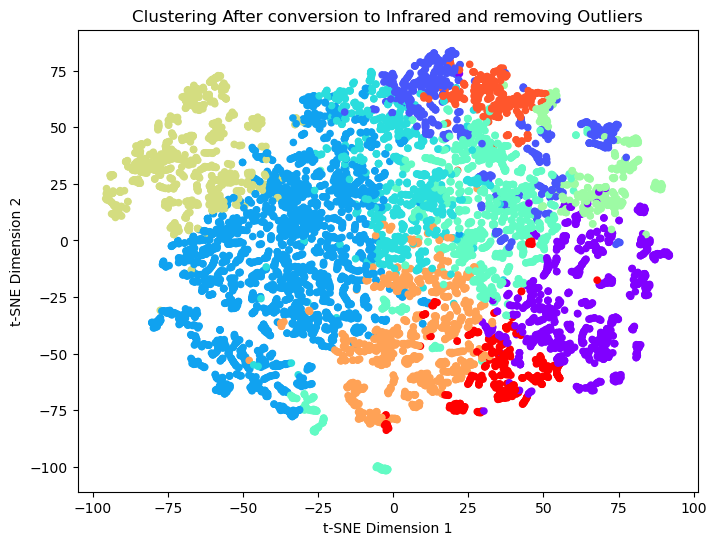

In [51]:
TSNEplots(infra_no_outliers,birch_labels_infra_no_outliers,"Clustering After conversion to Infrared and removing Outliers")

In [52]:
birch_labels_infrared_df_norm = birchfunc(infrared_df_norm, 10)

In [53]:
silhouetteScore(infrared_df_norm,birch_labels_infrared_df_norm)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.29379717360568686


0.29379717360568686

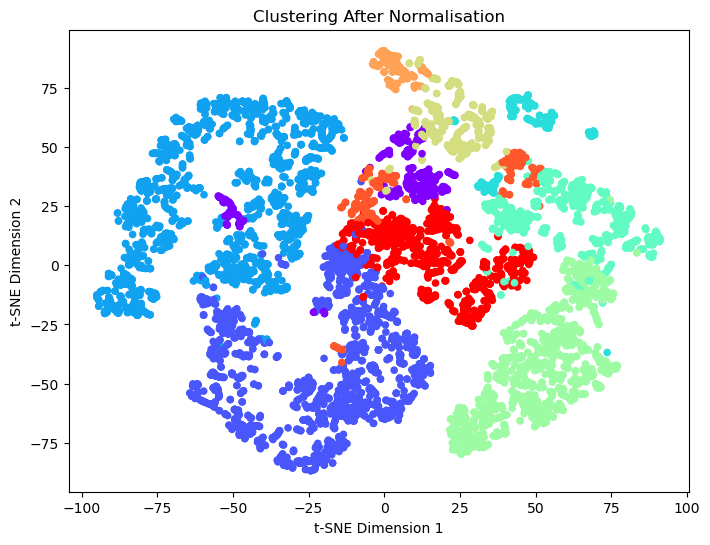

In [54]:
TSNEplots(infrared_df_norm,birch_labels_infrared_df_norm,"Clustering After Normalisation")

In [55]:
birch_labels_infrared_norm_no_outliers = birchfunc(infra_norm_no_outliers, 10)

In [56]:
silhouetteScore(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2908286104320689


0.2908286104320689

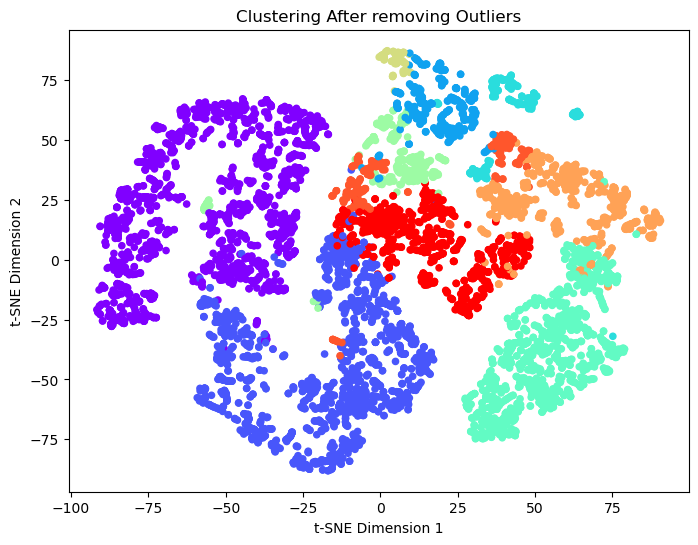

In [57]:
TSNEplots(infra_norm_no_outliers,birch_labels_infrared_norm_no_outliers,"Clustering After removing Outliers")

In [58]:

birch_infra_norm_no_outliers_2 = birchfunc(infra_norm_no_outliers, 2)


In [59]:
silhouetteScore(infra_norm_no_outliers,birch_infra_norm_no_outliers_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.43155433416909283


0.43155433416909283

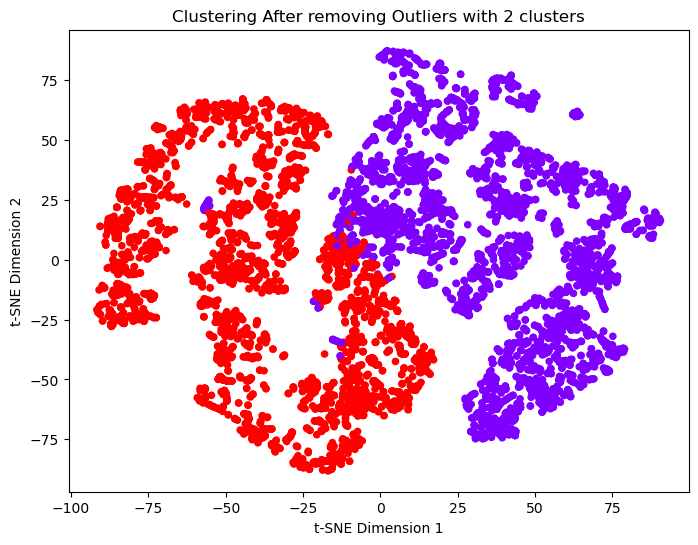

In [60]:
TSNEplots(infra_norm_no_outliers,birch_infra_norm_no_outliers_2,"Clustering After removing Outliers with 2 clusters")

In [61]:
birch_preprocessed = birchfunc(prepped_infrared_df, 10)


In [62]:
silhouetteScore(prepped_infrared_df,birch_preprocessed)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2694771753718034


0.2694771753718034

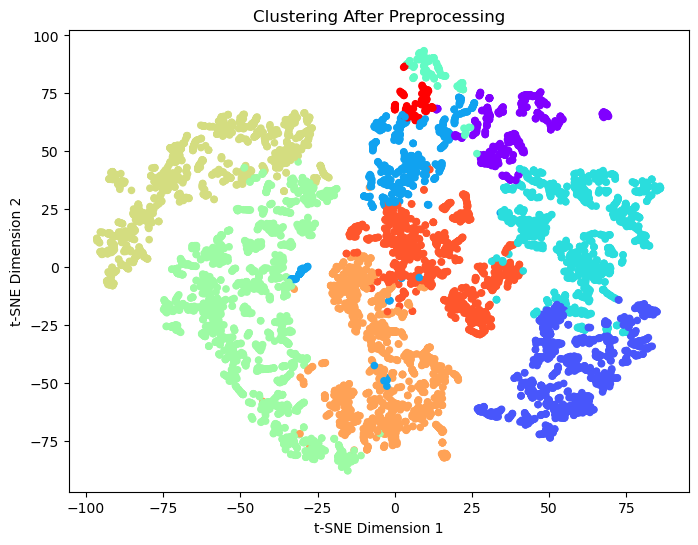

In [63]:
TSNEplots(prepped_infrared_df,birch_preprocessed,"Clustering After Preprocessing")

In [64]:
birch_preprocessed_2 = birchfunc(prepped_infrared_df, 2)


In [65]:
silhouetteScore(prepped_infrared_df,birch_preprocessed_2)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3868445629754047


0.3868445629754047

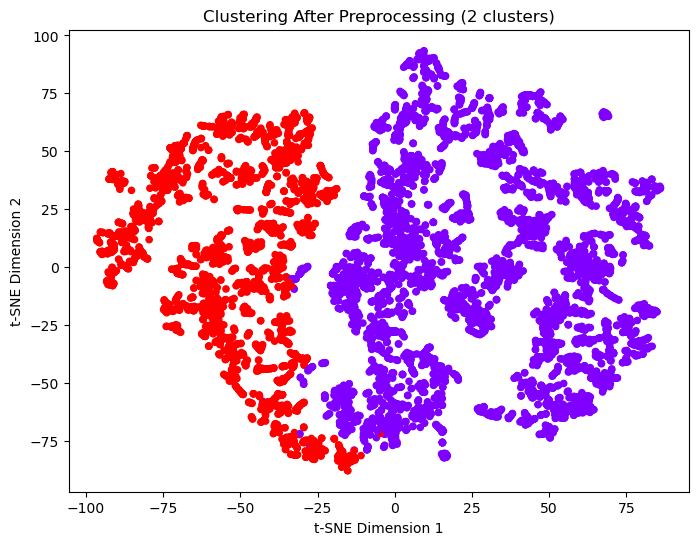

In [66]:
TSNEplots(prepped_infrared_df,birch_preprocessed_2,"Clustering After Preprocessing (2 clusters)")

In [86]:
birch_labels_final = birchfunc(testing_df,10)

In [68]:
silhouetteScore(testing_df,birch_labels_final)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.45358329187532015


0.45358329187532015

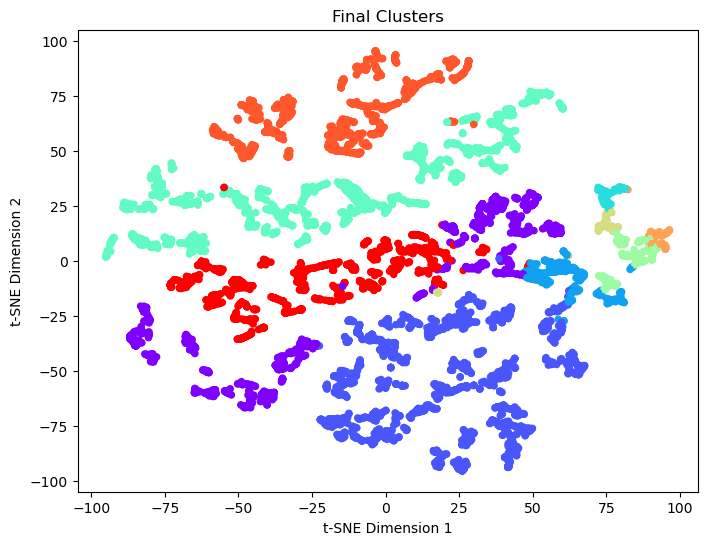

In [69]:
TSNEplots(testing_df,birch_labels_final,"Final Clusters")


In [73]:
silhouetteScoreAllRawBirch = [] 
for i in range(2, 12): 
    raw_labels_pred = birchfunc(x_train,i)
    silhouetteScoreAllRawBirch.append(silhouetteScore(x_train,raw_labels_pred))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3532791090619684


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1879831451772538


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.19888231502242126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.20393837995988515


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.21153913098707894


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.1983724831499671


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.2006722206263219


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.0941067338452834


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08563693469224311


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08785947340116355


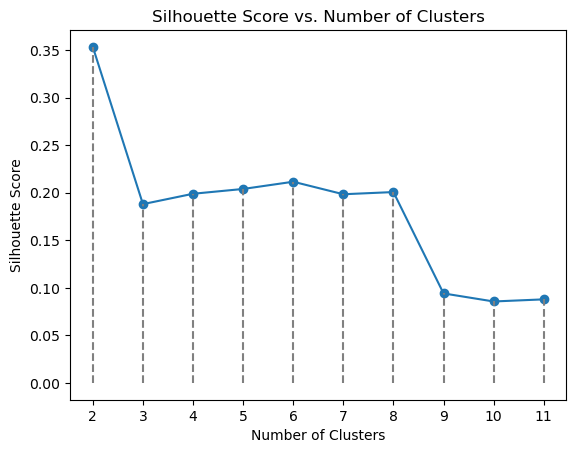

In [74]:
cluster_range = range(2, 12)
plt.plot(cluster_range, silhouetteScoreAllRawBirch, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouetteScoreAllRawBirch[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [75]:
silhouetteScoreAllFinalBirch = [] 
for i in range(2, 12): 
    final_labels_pred = birchfunc(testing_df,i)
    silhouetteScoreAllFinalBirch.append(silhouetteScore(testing_df,final_labels_pred))

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7356461348732126


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.49740497820875224


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5026851853104387


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.48859566431607565


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.515746183765349


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5208769405849668


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5210412926966709


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4628274317091819


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.45358329187532015


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.45782399699704873


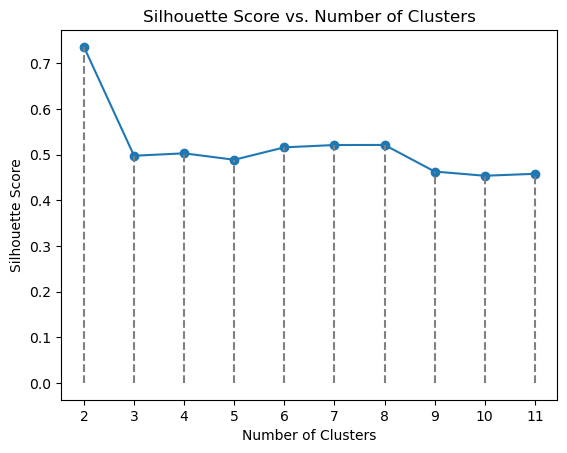

In [76]:
cluster_range = range(2, 12)
plt.plot(cluster_range, silhouetteScoreAllFinalBirch, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouetteScoreAllFinalBirch[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [77]:
raw_scores = silhouetteScoreAllRawBirch[::2]
processed_scores = silhouetteScoreAllFinalBirch[::2]
silhouette_bf = [raw_scores,processed_scores]

x_axis = ["Raw", "After Pre-processing"]
y_axis = ["2 Clusters", "4 Clusters", "6 Clusters", "8 Clusters", "10 Clusters"] 
pd.DataFrame(silhouette_bf, x_axis, y_axis)

,2 Clusters,4 Clusters,6 Clusters,8 Clusters,10 Clusters
Raw,0.353279,0.198882,0.211539,0.200672,0.085637
After Pre-processing,0.735646,0.502685,0.515746,0.521041,0.453583


In [79]:
out = [236
,237
,238
,239
,246
,247
,263
,265
,266,
267,
723,
731,
735,
1440,
1441,
2164,
2168,
2406,
2407,
2408,
2409,
2410,
2411,
2412,
2413,
2414,
2415,
2416,
2700,
2701,
2702,
2703,
2704,
2705,
2707,
2708,
2709,
2849,
2908,
2909,
2945,
2946,
3960,
3961,
3962,
4890,
4891,
4892,
4922,
4924,
4925,
4927,
4928,
4929,
5044,
5045,
5046,
5710,
6150,
6151,
6152,
6153,
6154,
6155,
6156,
6158,
6161,
6162,
6163,
6168,
8129,
8186,
8517,
8518,
8905,
8907,
8940,
8941,
8943,
8944,
8948,
8949,
8950,
8952,
8956,
8957,
8958,
8959,
8960,
8961,
8962,
8963,
9149,
9425,
9426,
9427,
9428
]

In [80]:
y_train = y_train.drop(out)

In [124]:
def accuracy_metric(testing_df, y_train, cluster_labels):
    data = []
    labels = []

    # Convert y_train to numpy array if it is a dataframe.

    if type(y_train) == pd.DataFrame:
        y_train_array = y_train.to_numpy()

    # Iterating through each cluster

    for cluster_label in np.unique(cluster_labels):
        
        # Getting the data points that belong to the current cluster by creating a boolean mask and 
        # applying it to our dataframe.

        cluster_mask = (cluster_labels == cluster_label)
        X_cluster = testing_df[cluster_mask]

        # Retrieving the corresponding ground truth labels from y_train.

        y_cluster = y_train_array[cluster_mask].flatten()

        # Appending the data points and labels to lists.

        data.append(X_cluster)
        labels.append(y_cluster)
    
    # Concatenating the lists into numpy arrays.

    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels)

    # Computing the accuracy score using the accuracy_score function from sklearn.
    
    accuracy = accuracy_score(y_train, labels)
    print("Accuracy:", accuracy)
    return accuracy

In [125]:
accuracy_final = accuracy_metric(testing_df,y_train,birch_labels_final)
accuracy_final

Accuracy: 0.02553945585322631


0.02553945585322631